# Principal Component Analysis

[Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) is an unsupervised machine learning technique. At a basic level, it summarizes information in many features by collapsing them into fewer features. PCA can be used for both exploratory data analysis and dimensionality reduction. For this exercise, we are going to use the [breast cancer dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) from sklearn. First, let's load in the data:

In [13]:
# load libraries
# ----------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# process data
# ----------
breast = load_breast_cancer()

# create an array of features 
breast_data = breast.data

# create array of target data
breast_labels = breast.target

# reshape target array
labels = np.reshape(breast_labels,(569,1))

# concatenate features and labels
final_breast_data = np.concatenate([breast_data,labels],axis=1)

# get feature names
features = breast.feature_names
features_labels = np.append(features,'label')

# coerce to dataframe and add column names
breast_dataset = pd.DataFrame(final_breast_data)
breast_dataset.columns = features_labels

In [4]:
# check out first 5 rows
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Let's take a look at the "label" column that will be our target:

In [5]:
# view label column
breast_dataset['label'].unique()

array([0., 1.])

Let's recode 0 to "benign" and 1 to "malignant" to make these more clear:

In [30]:
# recode labels
breast_dataset['label'].replace(0, 'Benign', inplace = True)
breast_dataset['label'].replace(1, 'Malignant', inplace = True)

As with supervised methods, scaling our data in advance is usually a good idea. Apply the sklearn [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to the features in our dataframe and save the result as an array called "X":

In [7]:
# load library 
# ----------
from sklearn.preprocessing import StandardScaler

# scale data
# ----------
X = breast_dataset.loc[:, features].values
X = StandardScaler().fit_transform(X) 

Now let's apply our PCA! Use the [`PCA()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) method from sklearn to perform a PCA on the breast cancer features and summarize them with two components.

In [8]:
# load library 
# ----------
from sklearn.decomposition import PCA

# apply PCA
# ----------
pca = PCA(n_components=2)
principalComponents_breast = pca.fit_transform(X)

In [9]:
# convert into a dataframe
# ----------
pca_df = pd.DataFrame(data = principalComponents_breast, 
                      columns = ['principal component 1', 
                                 'principal component 2'])

In [10]:
# view factor loadings as dataframe
pca_df.head()

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


<Figure size 432x288 with 0 Axes>

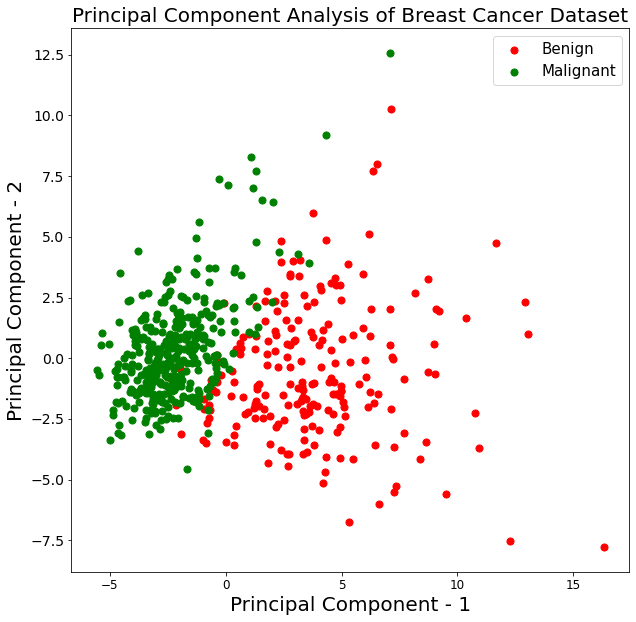

In [32]:
# plot
# ----------

# figure settings
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']

# loop over targets and colors to create scatterplot
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'principal component 1']
               , pca_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

# show figure
plt.legend(targets,prop={'size': 15})
# plt.show()

#### Using a scree plot to help determine the number of components to keep

To keep things simple in this lab, we limit the number of components above to 2. But if you wanted to know how many components to include, you might use a scree plot. Instead of specifying `n=2` above, you will not specify anything ,which will keep all components. You can then use the following code to create a scree plot using the `explained_variance_ratio_` attribute from the returned PCA object.

**QUESTION:** How many components might you keep just based on the scree plot?

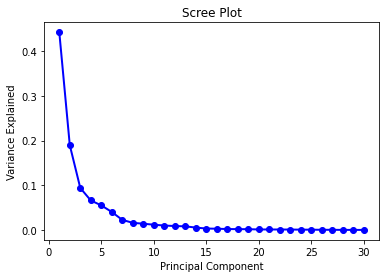

In [33]:
# Create a scree plot to evaluate the number of components to keep

# fit PCA
pca_all = PCA() # notice we do not specify the number of components if we want to keep them all
principalComponents_breast = pca_all.fit_transform(X)

# create scree plot from PCA fit
PC_values = np.arange(pca_all.n_components_) + 1
plt.plot(PC_values, pca_all.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

**ANSWER:** ...